##   Problem statement

In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


## 1. Loading the data

In [4]:
### Loading image array from images.npy file
images=np.load('/content/Drive/MyDrive/Files/ML-datasets/images.npy')

In [5]:
### Loading labels in data frames
y=pd.read_csv('/content/Drive/MyDrive/Files/ML-datasets/Labels.csv')

In [6]:
#### printing the size of images
print(f' size of images :{images.shape[0]}')
images.shape

 size of images :4750


(4750, 128, 128, 3)

In [7]:
#### printing the size of labels
y.shape

(4750, 1)

In [8]:
y.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [9]:
y.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [10]:
##printing label at 1000 index
print(y.loc[1000])
print(y.loc[0,:])
print(y.loc[100,"Label"])
print(y.iloc[0,:])

Label    Shepherds Purse
Name: 1000, dtype: object
Label    Small-flowered Cranesbill
Name: 0, dtype: object
Small-flowered Cranesbill
Label    Small-flowered Cranesbill
Name: 0, dtype: object


In [11]:
#### convert labels to array
labels = []
for label in y['Label']:
    labels.append(label)


In [12]:
labels[1000]

'Shepherds Purse'

### Visualizing images in dataset 

In [13]:
###print the pictures of different t
from keras.preprocessing import image
# plotting 2 x 3 image matrix
def printImages(images,y):
  fig = plt.figure(figsize = (10,10))
  i=0
  for g, d in y.groupby('Label'):
    print(f'Label : {d.Label.values[0]}') # selects the first value of each group and prints it
    index=(d.index[0])
    label = d.Label.values[0]
    

    ax = fig.add_subplot(12, 1, i+1)
      
    plt.imshow(images[index], cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
    plt.show()

Label : Black-grass


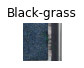

Label : Charlock


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


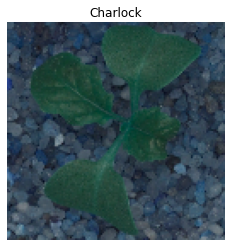

Label : Cleavers


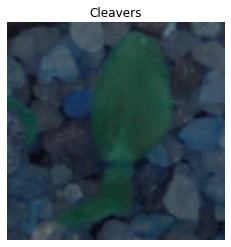

Label : Common Chickweed


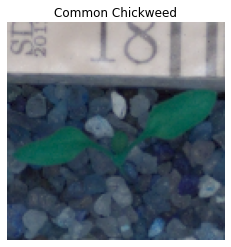

Label : Common wheat


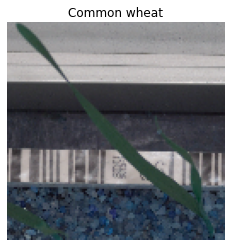

Label : Fat Hen


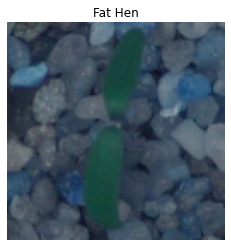

Label : Loose Silky-bent


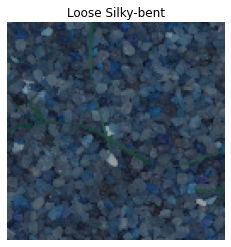

Label : Maize


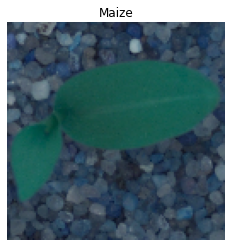

Label : Scentless Mayweed


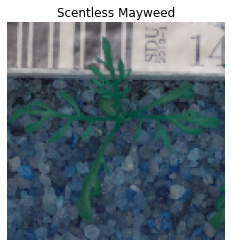

Label : Shepherds Purse


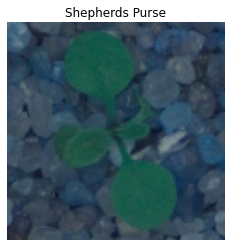

Label : Small-flowered Cranesbill


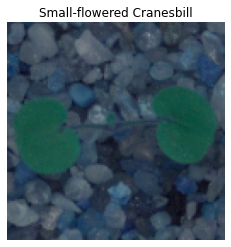

Label : Sugar beet


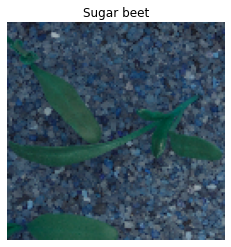

In [14]:
printImages(images,y)

## 2,3 Exploratory Data Analysis & insights

In [15]:
y_grouped = y.value_counts().reset_index(name='count')
y_grouped



Label  count
0            Loose Silky-bent    654
1            Common Chickweed    611
2           Scentless Mayweed    516
3   Small-flowered Cranesbill    496
4                     Fat Hen    475
5                    Charlock    390
6                  Sugar beet    385
7                    Cleavers    287
8                 Black-grass    263
9             Shepherds Purse    231
10                      Maize    221
11               Common wheat    221

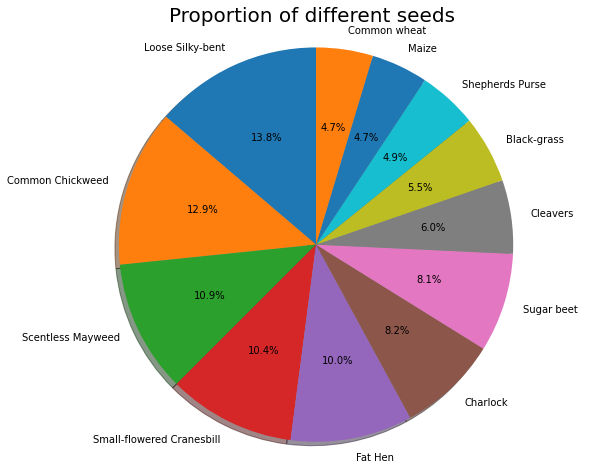

In [16]:
#plotting the pie chart 
labels = y_grouped['Label']
sizes = y_grouped['count']
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of different seeds ", size = 20)
plt.show()

* from the above pie char, this dataset  is quite balanced.

### Finding the mean image for different type of seeds

In [17]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128,3))
    plt.imshow(mean_img.astype('uint8'),  vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

In [18]:
#### Find the mean image for each category

silky_bent_data=[]
commonChickWeed_data=[]
mayweed_data=[]
Cranesbill_data=[]
fatHen_data=[]
charlock_data=[]
sugarbeet_data=[]
cleavers_data=[]
blackGrass_data=[]
shepards_purse_data=[]
maize_data=[]
common_wheat_data=[]

new_images =[]


#for label in labels:
#  new_images =[]

for i,img in enumerate(images):
    
  if y.loc[i,"Label"] == 'Loose Silky-bent':
    img_f = img.astype('float32')

    silky_bent_data.append(img_f)

  if y.loc[i,"Label"] == 'Common Chickweed':
    img_f = img.astype('float32')
    commonChickWeed_data.append(img_f)

  if y.loc[i,"Label"] == 'Scentless Mayweed':
    img_f = img.astype('float32')
    mayweed_data.append(img_f)

  if y.loc[i,"Label"] == 'Small-flowered Cranesbill':
    img_f = img.astype('float32')
    Cranesbill_data.append(img_f)

  if y.loc[i,"Label"] == 'Fat Hen':
    img_f = img.astype('float32')
    fatHen_data.append(img_f)

   
  if y.loc[i,"Label"] == 'Charlock':
    img_f = img.astype('float32')
    charlock_data.append(img_f)

   
  if y.loc[i,"Label"] == 'Sugar beet':
    img_f = img.astype('float32')
    sugarbeet_data.append(img_f)

    
  if y.loc[i,"Label"] == 'Cleavers':
    img_f = img.astype('float32')
    cleavers_data.append(img_f)
  
  if y.loc[i,"Label"] == 'Black-grass':
    img_f = img.astype('float32')
    blackGrass_data.append(img_f)

  
  if y.loc[i,"Label"] == 'Shepherds Purse':
    img_f = img.astype('float32')
    shepards_purse_data.append(img_f)

    
  if y.loc[i,"Label"] == 'Maize':
    img_f = img.astype('float32')
    maize_data.append(img_f)
  
  if y.loc[i,"Label"] == 'Common wheat':
    img_f = img.astype('float32')
    common_wheat_data.append(img_f)

  

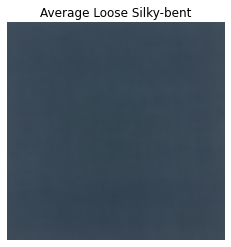

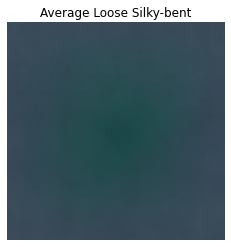

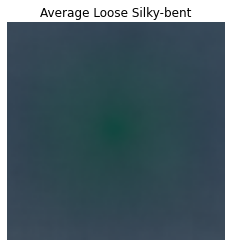

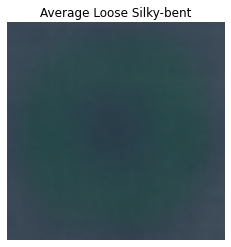

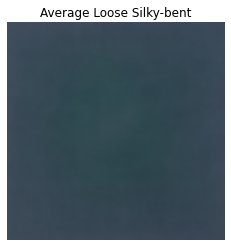

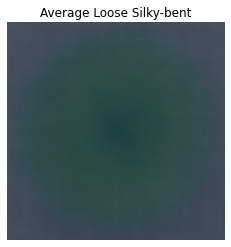

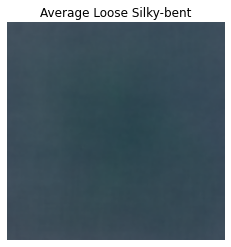

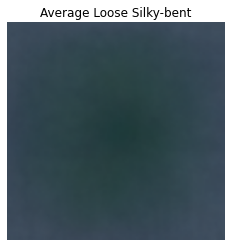

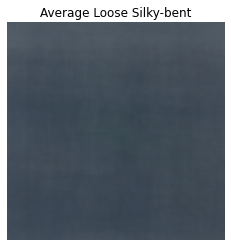

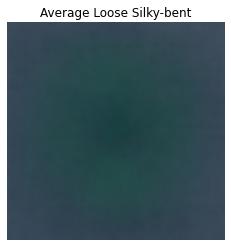

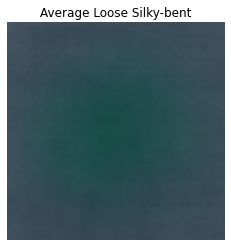

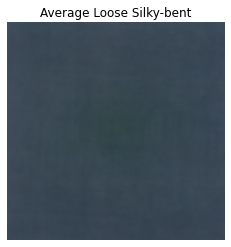

In [19]:
silky_bent_mean = find_mean_img(np.array(silky_bent_data), label)
commonChickWeed_mean = find_mean_img(np.array(commonChickWeed_data), label)
mayweed_mean = find_mean_img(np.array(mayweed_data), label)
Cranesbill_mean = find_mean_img(np.array(Cranesbill_data), label)
fatHen_mean = find_mean_img(np.array(fatHen_data), label)
charlock_mean = find_mean_img(np.array(charlock_data), label)
sugarbeet_mean = find_mean_img(np.array(sugarbeet_data), label)
cleavers_mean = find_mean_img(np.array(cleavers_data), label)
blackGrass_mean = find_mean_img(np.array(blackGrass_data), label)
shepards_purse_mean = find_mean_img(np.array(shepards_purse_data), label)
maize_mean = find_mean_img(np.array(maize_data), label)
common_wheat_mean = find_mean_img(np.array(common_wheat_data), label)


### Contrast Difference

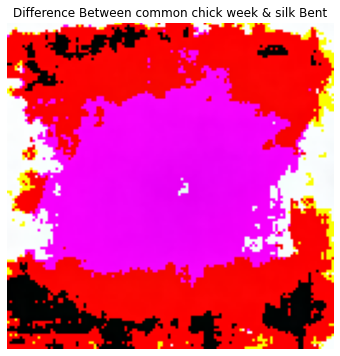

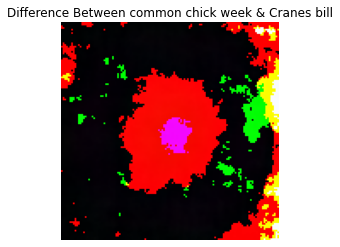

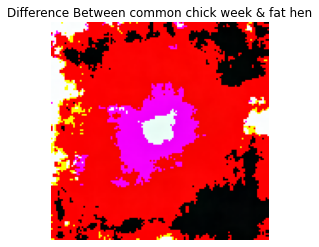

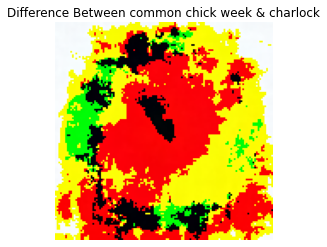

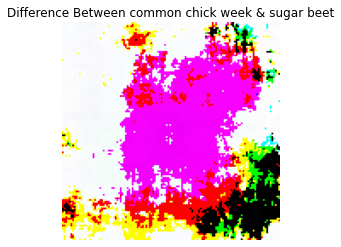

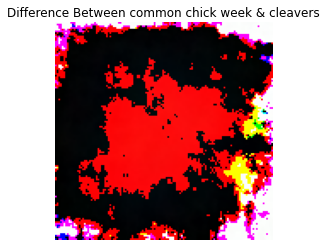

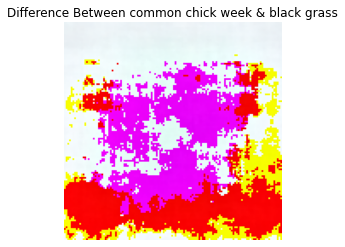

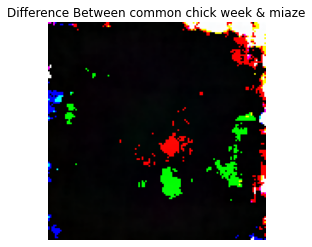

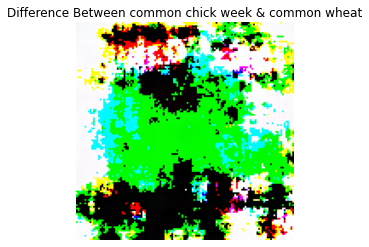

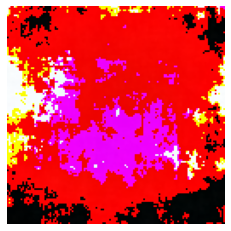

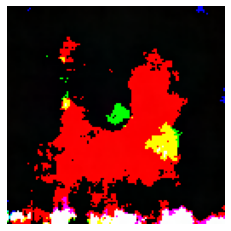

In [20]:
### Contrast difference with common_weed
fig = plt.figure(figsize = (8,6))

for i in enumerate([silky_bent_mean,Cranesbill_mean,fatHen_mean,charlock_mean,sugarbeet_mean,cleavers_mean,blackGrass_mean,shepards_purse_mean
                    ,maize_mean,common_wheat_mean,mayweed_mean]):
      
      contrast_mean = commonChickWeed_mean - i[1]
      plt.imshow(contrast_mean.astype('uint8'), cmap='bwr')
      if i[0]==0:
          plt.title(f'Difference Between common chick week & silk Bent')
      if i[0]==1:
          plt.title(f'Difference Between common chick week & Cranes bill')
      if i[0]==2:
          plt.title(f'Difference Between common chick week & fat hen')
      if i[0]==3:
          plt.title(f'Difference Between common chick week & charlock')
      if i[0]==4:
          plt.title(f'Difference Between common chick week & sugar beet')
      if i[0]==5:
          plt.title(f'Difference Between common chick week & cleavers')
      if i[0]==6:
          plt.title(f'Difference Between common chick week & black grass')
      if i[0]==7:
          plt.title(f'Difference Between common chick week & shepards purse')
      if i[0]==7:
          plt.title(f'Difference Between common chick week & miaze')
      if i[0]==8:
          plt.title(f'Difference Between common chick week & common wheat')
      
      
    
      plt.axis('off')
      plt.show()

* We can not see too much difference through contrast difference. 

## 4. Data Preprocessing

#### Normalizing Data

In [21]:
images = images.astype('float32')

images /= 255

### Guassian blurring

In [22]:
images.shape

(4750, 128, 128, 3)

In [23]:
images_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    -1, 
    images.reshape((-1, 128, 128,3))
)
images_new = images_new.reshape((-1, 128, 128,3))

Label : Black-grass


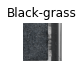

Label : Charlock


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


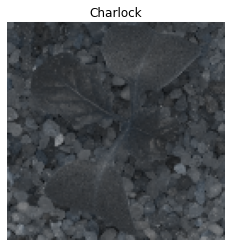

Label : Cleavers


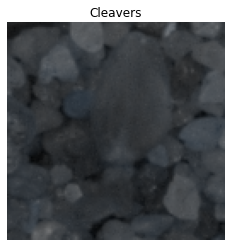

Label : Common Chickweed


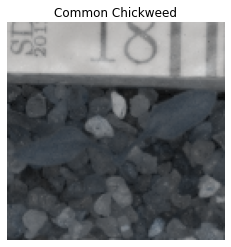

Label : Common wheat


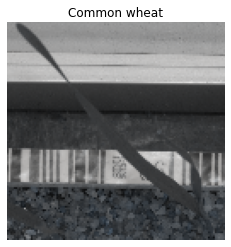

Label : Fat Hen


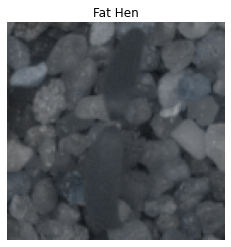

Label : Loose Silky-bent


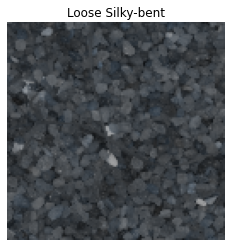

Label : Maize


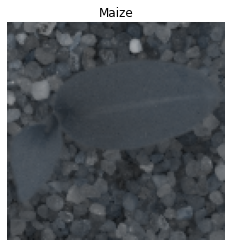

Label : Scentless Mayweed


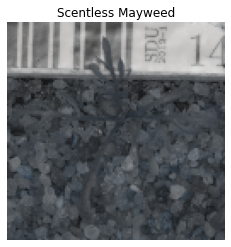

Label : Shepherds Purse


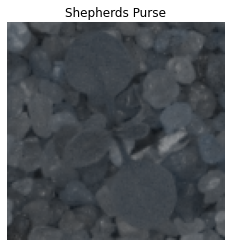

Label : Small-flowered Cranesbill


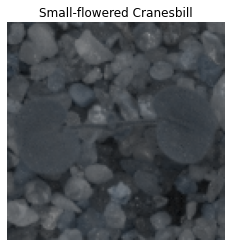

Label : Sugar beet


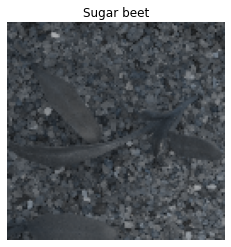

In [24]:
###printing blurred image
printImages(images_new,y)

Label : Black-grass


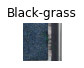

Label : Charlock


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


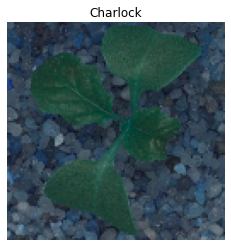

Label : Cleavers


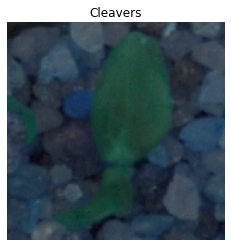

Label : Common Chickweed


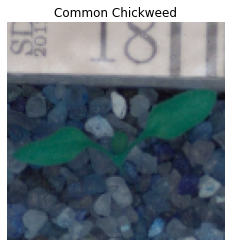

Label : Common wheat


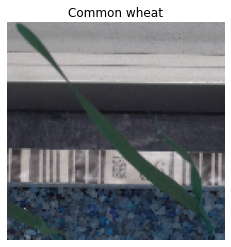

Label : Fat Hen


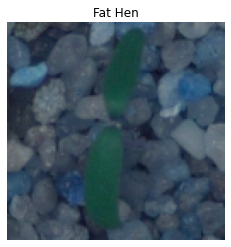

Label : Loose Silky-bent


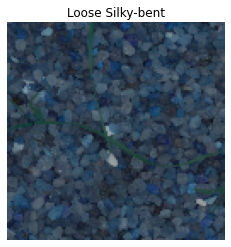

Label : Maize


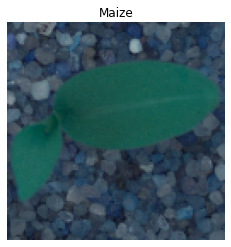

Label : Scentless Mayweed


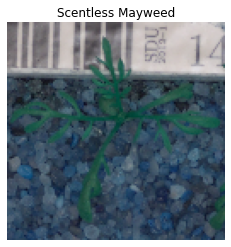

Label : Shepherds Purse


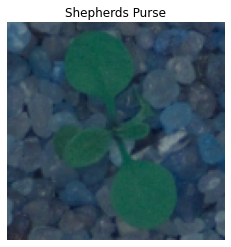

Label : Small-flowered Cranesbill


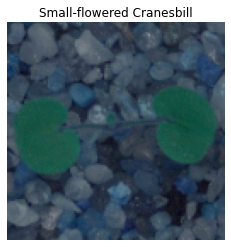

Label : Sugar beet


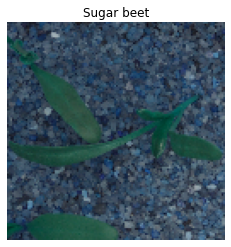

In [25]:
#### printing original images for comparision
printImages(images,y)

## 5. Make data compatible

### One Hot encoding
 * As y has labels instead of integer number so we have to first use label encoderencodingd= 

In [26]:

# Import label encoder
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(integer_encoded, num_classes=12)

print("Shape of y_encoded:", y_encoded.shape)
print("One value of y_encoded:", y_encoded[0])


Shape of y_encoded: (4750, 12)
One value of y_encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Splitting the data into Training testing and validation data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(images_new, y_encoded, train_size=0.75, random_state=0)

In [28]:
X_val,X_test,y_val,y_test=train_test_split(X_test, y_test, train_size=0.8, random_state=0)

#### Printing the shape of data

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3562, 128, 128, 3)
(3562, 12)
(950, 128, 128, 3)
(950, 12)
(238, 128, 128, 3)
(238, 12)


### Check train, validation and test sets, if in compatible shapes
We can see from above shape details, that all three are already compatible.



## 6, 7, 8 Model Building, evaluation and performance improvement 


### 1. CNN model (with 3 conv2D *layers*)

In [30]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(5,5), padding= 'same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3), padding= 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3), padding= 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(12,activation="softmax"))

optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer= optimizer, loss="categorical_crossentropy",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history=model.fit(X_train, y_train, epochs=30, batch_size=64,validation_split=0.20,callbacks=[es],use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
45/45 [==============================] - 42s 190ms/step - loss: 2.4951 - accuracy: 0.1299 - val_loss: 2.4287 - val_accuracy: 0.1431
Epoch 2/30
45/45 [==============================] - 7s 145ms/step - loss: 2.4159 - accuracy: 0.1474 - val_loss: 2.3485 - val_accuracy: 0.1739
Epoch 3/30
45/45 [==============================] - 6s 144ms/step - loss: 2.3764 - accuracy: 0.1622 - val_loss: 2.2915 - val_accuracy: 0.1683
Epoch 4/30
45/45 [==============================] - 6s 144ms/step - loss: 2.3287 - accuracy: 0.1653 - val_loss: 2.3832 - val_accuracy: 0.1473
Epoch 5/30
45/45 [==============================] - 7s 145ms/step - loss: 2.2982 - accuracy: 0.1888 - val_loss: 2.2291 - val_accuracy: 0.2160
Epoch 6/30
45/45 [==============================] - 7s 146ms/step - loss: 2.1785 - accuracy: 0.2418 - val_loss: 2.2046 - val_accuracy: 0.2146
Epoch 7/30
45/45 [==============================] - 7s 145ms/step - loss: 2.0092 - accuracy: 0.3075 - val_loss: 2.1877 - val_accuracy: 0.2553
Epoch

In [31]:

model.evaluate(X_val, y_val)

30/30 [==============================] - 2s 43ms/step - loss: 3.9306 - accuracy: 0.2884


[3.9306180477142334, 0.28842106461524963]

* This mdoel is performing really bad.

### 2. CNN Model with 5 conv2D

---



In [32]:
model1 = Sequential()
model1.add(Conv2D(filters= 64, kernel_size=(5,5), padding= 'same',activation='relu',input_shape=(128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters= 128, kernel_size=(3,3), padding= 'same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters= 128, kernel_size=(3,3), padding= 'same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(filters= 128, kernel_size=(3,3), padding= 'valid',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(filters= 256, kernel_size=(3,3), padding= 'valid',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
#
model1.add(Flatten())
model1.add(Dense(1024,activation="relu"))

model1.add(Dense(12,activation="softmax"))

optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model1.compile(optimizer= optimizer, loss="categorical_crossentropy",metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model1.fit(X_train, y_train, epochs=30, batch_size=64,validation_split=0.20,callbacks=[es,mc],use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
45/45 [==============================] - 7s 146ms/step - loss: 2.4369 - accuracy: 0.1358 - val_loss: 2.4122 - val_accuracy: 0.1431

Epoch 00001: val_accuracy improved from -inf to 0.14306, saving model to best_model.h5
Epoch 2/30
45/45 [==============================] - 6s 137ms/step - loss: 2.4254 - accuracy: 0.1348 - val_loss: 2.4067 - val_accuracy: 0.1431

Epoch 00002: val_accuracy did not improve from 0.14306
Epoch 3/30
45/45 [==============================] - 6s 137ms/step - loss: 2.4196 - accuracy: 0.1288 - val_loss: 2.3693 - val_accuracy: 0.1431

Epoch 00003: val_accuracy did not improve from 0.14306
Epoch 4/30
45/45 [==============================] - 6s 137ms/step - loss: 2.3882 - accuracy: 0.1439 - val_loss: 2.3256 - val_accuracy: 0.1683

Epoch 00004: val_accuracy improved from 0.14306 to 0.16830, saving model to best_model.h5
Epoch 5/30
45/45 [==============================] - 6s 136ms/step - loss: 2.3446 - accuracy: 0.1551 - val_loss: 2.3777 - val_accuracy: 0.1459

#### Final Loss and accuracy on Validation set

In [33]:
model1.evaluate(X_val, y_val)

30/30 [==============================] - 1s 28ms/step - loss: 2.0755 - accuracy: 0.5295


[2.075531005859375, 0.5294736623764038]

* Validation accuracy is too bad for both train set and validation set.

#### Predict labels for test data

In [34]:
#### Predicting test data. To generate confusion matrix, need to convert both predictions and test labels as single digit, and not as vectors
rounded_pred = model1.predict(X_test)
rounded_pred_labels = np.argmax(rounded_pred, axis=1)

In [35]:
rounded_pred_labels.shape

(238,)

In [36]:
rounded_test_labels = np.argmax(y_test, axis=1)
rounded_test_labels.shape

(238,)

#### Confusion Matrix

In [37]:

from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_test_labels, rounded_pred_labels)
print(cm)

=== Confusion Matrix ===
[[ 1  0  0  0  1  0 10  0  0  0  1  0]
 [ 1 14  3  3  1  0  1  0  1  2  3  1]
 [ 0  2  5  2  0  0  1  0  1  0  0  0]
 [ 0  0  3 22  1  8  3  0  4  1  0  0]
 [ 2  0  0  1  3  0  4  0  1  0  0  1]
 [ 0  0  1  6  1  8  2  1  0  1  0  1]
 [ 0  0  0  1  0  2 19  0  3  0  0  0]
 [ 0  2  0  4  2  0  0 10  1  0  0  1]
 [ 0  0  0  5  0  0  8  0 14  0  0  0]
 [ 0  1  0  3  0  0  0  0  3  2  0  0]
 [ 0  1  1  0  0  1  0  0  1  1 12  0]
 [ 0  0  0  2  1  2  0  0  0  2  0  4]]


#### Final Loss and Accuracy

In [38]:

model1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 25ms/step - loss: 2.0123 - accuracy: 0.4790


[2.0123183727264404, 0.4789915978908539]

#### Let's visualize the predicted result

Predicted label: 6
Softmax Outputs: [[3.2764059e-02 5.6018623e-10 3.1805741e-12 3.5561008e-08 7.9949396e-03
  6.9149024e-08 9.5914948e-01 3.4501128e-11 9.1266767e-05 2.1276061e-10
  1.0348858e-09 2.4028978e-07]]
1.0000001


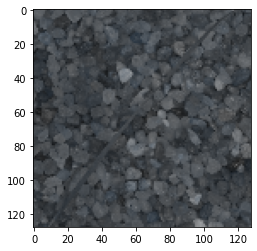

In [39]:
#### predicting lable for test data and printing it
plt.imshow(X_test[2].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

* After complete model evaluation, it is clear that this model is not good.

### 3. CNN without blurring the images

In [40]:
# Split data into test and train to build the model. 70% is train data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(images, y_encoded, test_size=0.3, random_state=0)

X_test_c, X_val_c, y_test_c, y_val_c = train_test_split(X_test_c, y_test_c, test_size=0.5, random_state=0)

#### Printing the shape of dataset

In [41]:
print(X_train_c.shape)
print(X_test_c.shape)
print(y_train_c.shape)
print(y_test_c.shape)
print(X_val_c.shape)
print(y_val_c.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 128, 128, 3)
(713, 12)


In [42]:

from tensorflow.keras.layers import GlobalMaxPool2D

cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(GlobalMaxPool2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(12, activation="softmax"))

# Compile the model
cnn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
cnn_model.fit( x=X_train_c, y=y_train_c, batch_size=35, epochs=30, validation_split = 0.3)

cnn_model.evaluate(X_val_c, y_val_c)

Epoch 1/30
67/67 [==============================] - 7s 82ms/step - loss: 2.1392 - accuracy: 0.2892 - val_loss: 2.9254 - val_accuracy: 0.1423
Epoch 2/30
67/67 [==============================] - 5s 69ms/step - loss: 1.4624 - accuracy: 0.5208 - val_loss: 3.2386 - val_accuracy: 0.1423
Epoch 3/30
67/67 [==============================] - 5s 68ms/step - loss: 1.0649 - accuracy: 0.6579 - val_loss: 4.4689 - val_accuracy: 0.1423
Epoch 4/30
67/67 [==============================] - 5s 68ms/step - loss: 0.8716 - accuracy: 0.7104 - val_loss: 4.7221 - val_accuracy: 0.1423
Epoch 5/30
67/67 [==============================] - 5s 68ms/step - loss: 0.7130 - accuracy: 0.7671 - val_loss: 5.7616 - val_accuracy: 0.1423
Epoch 6/30
67/67 [==============================] - 5s 68ms/step - loss: 0.5790 - accuracy: 0.8139 - val_loss: 5.0771 - val_accuracy: 0.1433
Epoch 7/30
67/67 [==============================] - 5s 68ms/step - loss: 0.5050 - accuracy: 0.8427 - val_loss: 2.4717 - val_accuracy: 0.3116
Epoch 8/30
67

[0.45069190859794617, 0.8821879625320435]

* Model has good accuracy for validation set. WE can check model performace with test set.

#### Model Summary

In [43]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)      

#### Predicting labels for test data

In [50]:
# Predicting test data. To generate confusion matrix, need to convert both predictions and test labels as single digit, and not as vectors
rounded_pred1 = cnn_model.predict(X_test_c)

rounded_pred_labels1 = np.argmax(rounded_pred1, axis=1)
rounded_pred_labels1.shape

(712,)

In [51]:
rounded_test_labels1 = np.argmax(y_test_c, axis=1)
rounded_test_labels1.shape

(712,)

In [52]:
print(X_test_c.shape)
y_test_c.shape

(712, 128, 128, 3)


(712, 12)

#### Confusion matrix

In [53]:

print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_test_labels1, rounded_pred_labels1)
print(cm)

=== Confusion Matrix ===
[[19  0  0  0  2  0 15  1  0  0  0  0]
 [ 0 47  2  0  0  0  0  0  0  1  0  0]
 [ 0  1 47  1  0  0  1  0  1  0  0  0]
 [ 0  0  0 87  0  0  0  0  8  0  0  0]
 [ 1  0  3  0 29  0  0  2  0  0  0  0]
 [ 0  0  1  0  2 79  1  2  0  0  0  0]
 [ 9  0  0  0  0  1 84  0  2  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 77  0  0  0]
 [ 0  0  0  1  0  0  0  0 11 28  0  0]
 [ 0  0  1  1  0  0  0  2  0  0 56  0]
 [ 1  0  2  0  0  0  0  3  1  1  0 52]]


#### Final loss and Accuracy

In [54]:
cnn_model.evaluate(X_test_c, y_test_c)

23/23 [==============================] - 1s 22ms/step - loss: 0.4455 - accuracy: 0.8862


[0.4455389380455017, 0.8862359523773193]

* model has good accuracy for test results too. So this model is good.

#### Let's visualize prediction results¶

Predicted label: 11
Softmax Outputs: [[1.2813213e-01 1.0782785e-04 1.3715993e-03 2.4391674e-02 1.0670526e-04
  2.7722132e-03 1.5645232e-02 1.9069338e-02 6.9633636e-05 5.8664245e-05
  1.9107413e-06 8.0827302e-01]]
0.99999994


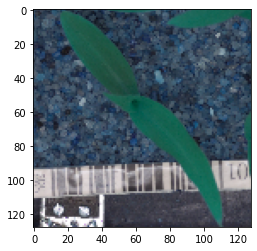

In [55]:
#### predicting lable for test data and printing it
plt.imshow(X_test_c[2].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test_c[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 10
Softmax Outputs: [[7.3293045e-08 1.9472466e-04 7.6748171e-07 4.7487796e-09 8.2019316e-09
  1.1499354e-08 2.2270628e-09 6.5951622e-10 1.1543563e-09 2.3737764e-06
  9.9980205e-01 5.8707670e-08]]
1.0


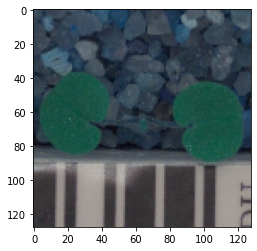

In [56]:
#### predicting lable for test data and printing it
plt.imshow(X_test_c[3].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test_c[3].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 3
Softmax Outputs: [[4.1119517e-03 1.4084166e-04 4.1559889e-04 3.8083854e-01 5.2154183e-02
  9.5707148e-02 7.1018554e-02 9.6765056e-04 3.2834601e-01 6.5060496e-02
  6.2617917e-05 1.1763808e-03]]
0.99999994


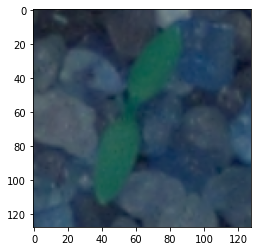

In [57]:
#### predicting lable for test data and printing it
plt.imshow(X_test_c[33].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test_c[33].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 3
Softmax Outputs: [[3.03983968e-03 3.12792565e-07 3.69993586e-06 3.53967249e-01
  2.34304264e-01 3.18834364e-01 5.72304763e-02 1.96447421e-04
  1.27331875e-02 2.29129801e-04 2.72702232e-06 1.94582120e-02]]
0.9999999


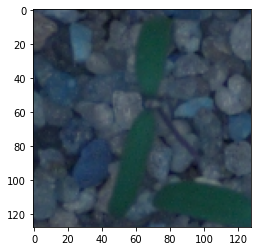

In [58]:
#### predicting lable for test data and printing it
plt.imshow(X_test_c[36].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test_c[36].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 6
Softmax Outputs: [[3.7743956e-01 1.8371544e-07 4.1494790e-09 4.9875386e-04 4.7132271e-05
  6.0987918e-07 6.2158859e-01 8.0900772e-06 2.4678754e-06 9.0021040e-08
  5.0982799e-05 3.6358373e-04]]
1.0


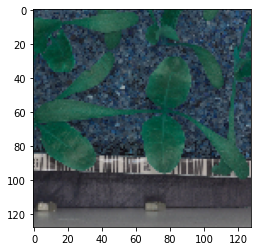

In [59]:
#### predicting lable for test data and printing it
plt.imshow(X_test_c[59].reshape(128, 128,3), cmap='gray')
y_pred = model1.predict(X_test_c[59].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


## 9. Conclusion 
- From the above steps, we can see that converting images to gray scale not helped in achieving better result in this problem. And, using colored images accuracy result is higher.